In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter as fsf
from plots.mpltoolkit import mpl_loc, named_colors, fancy_legend, load_mpl_presets
import numpy as np
import sys
sys.path.append("..")
from src.smf import bell03, baldry12
load_mpl_presets()
print(sys.version_info)

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


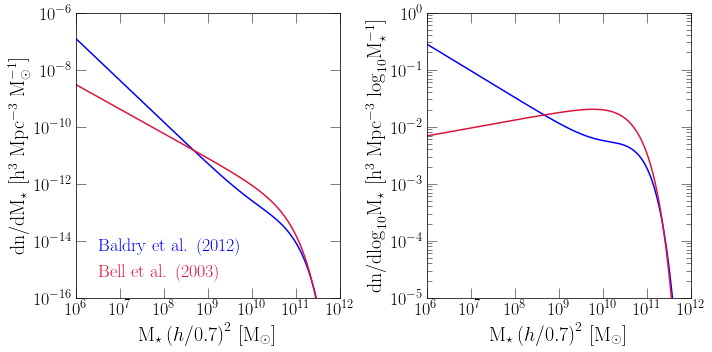

In [2]:
fig = plt.figure(figsize = (10, 5))
axes = []
for i in range(2):
    axes.append(fig.add_subplot(121 + i))
    axes[i].set_xlabel(r"M$_\star\left(h/0.7\right)^2$ [M$_\odot$]")
    axes[i].set_xscale("log")
    axes[i].set_yscale("log")
    axes[i].set_xlim([1e6, 1e12])
    axes[i].set_xticks([10**_ for _ in range(6, 13)])
axes[0].set_ylim([1e-16, 1e-6])
axes[1].set_ylim([1.e-5, 1])
axes[0].set_ylabel(r"dn/dM$_\star$ [h$^3$ Mpc$^{-3}$ M$_\odot^{-1}$]")
axes[1].set_ylabel(r"dn/d$\log_{10}$M$_\star$ [h$^3$ Mpc$^{-3}$ $\log_{10}$M$_\star^{-1}$]")

kwargs = {
    "c": named_colors()["blue"],
    "label": "Baldry et al. (2012)"
}
xvals = np.logspace(6, 12, 1001)
yvals = [baldry12(_) for _ in xvals]
axes[0].plot(xvals, yvals, **kwargs)
yvals = [_ * np.log(10) * baldry12(_) for _ in xvals]
axes[1].plot(xvals, yvals, **kwargs)


kwargs["c"] = named_colors()["crimson"]
kwargs["label"] = "Bell et al. (2003)"
yvals = [bell03(_) for _ in xvals]
axes[0].plot(xvals, yvals, **kwargs)
yvals = [_ * np.log(10) * bell03(_) for _ in xvals]
axes[1].plot(xvals, yvals, **kwargs)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, ["blue", "crimson"])

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./smfs.%s" % (ext), **kwargs)
plt.show()

In [3]:
bell03_sampled = np.genfromtxt("../src/c/bell03.test.dat")
# bell03_analytic = np.genfromtxt("../src/c/bell03.analytic.out")
baldry12_sampled = np.genfromtxt("../src/c/baldry12.test.dat")
# print(bell03_sampled)

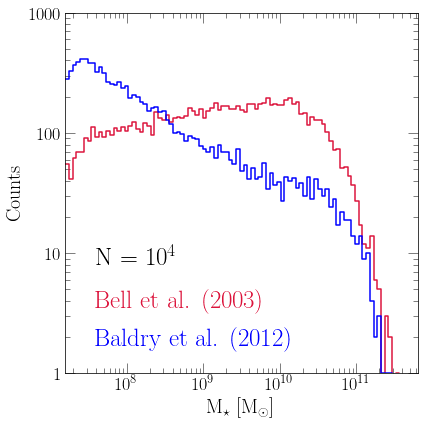

In [5]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_xlabel(r"M$_\star$ [M$_\odot$]")
# ax.set_ylabel(r"dn/dM$_\star$ [h$^3$ Mpc$^{-3}$ M$_\odot^{-1}$]")
# ax.set_ylabel(r"dn/d$\log_{10}$M$_\star$ [h$^3$ Mpc$^{-3}$ $\log_{10}$M$_\star^{-1}$]")
ax.set_ylabel("Counts")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([10**7.2, 10**11.8])
ax.set_ylim([1, 1000])
ax.yaxis.set_major_formatter(fsf("%g"))

kwargs = {
    "where": "post",
    "c": named_colors()["crimson"],
    "label": "Bell et al. (2003)"
}
bins = np.logspace(7.2, 12, 100)
counts, _ = np.histogram(bell03_sampled, bins = bins)
ax.step(bins[:-1], counts, **kwargs)
kwargs["c"] = named_colors()["blue"]
kwargs["label"] = "Baldry et al. (2012)"
counts, _ = np.histogram(baldry12_sampled, bins = bins)
ax.step(bins[:-1], counts, **kwargs)
ax.text(4.e7, 8, r"N = $10^4$", fontsize = 25)

kwargs = {
    "loc": mpl_loc("lower left"),
    "handlelength": 0,
    "fontsize": 25
}
leg = ax.legend(**kwargs)
fancy_legend(leg, ["crimson", "blue"])

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./sampled_smfs.%s" % (ext), **kwargs)
plt.show()